<a href="https://colab.research.google.com/github/furkanmemis/BTK_Tensorflow/blob/master/Breast_Cancer_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


# Read DataFrame

In [4]:
df = pd.read_csv("Data/Breast_Cancer.csv")
pd.set_option('display.max_columns', None)

In [5]:
def DataFrame_Check(data,head_number = 5):
  print("################## HEAD ##################")
  print(data.head(head_number))
  print("################## TAIL ##################")
  print(data.tail(head_number))
  print("################## COLUMNS ##################")
  print(data.columns)
  print("################## INFO ##################")
  data.info()
  print("################## DESCRIBE ##################")
  print(data.describe())
  print("################## SHAPE ##################")
  print(data.shape)
  print("################## NDIM ##################")
  print(data.ndim)

In [6]:
DataFrame_Check(df)

################## HEAD ##################
   Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1

In [7]:
# TARGET VALUE = Status
Target = "Status"

# EDA

In [8]:
def columns_analysis(df, cat_th = 10, car_th = 20):
  """
      columns_analysis function splits data frame columns. It consists of categorical, numeric and cardinal columns

      Parameters:
        df: DataFrame
        cat_th: int, categorical number
        car_th: int, cardinal number

      Return:
        categorical columns, numerical columns, cardinal columns

  """

  categorical_columns = [col for col in df.columns if df[col].dtype == "O"]
  numerical_but_categorical_columns = [col for col in df.columns if df[col].dtype != "O" and df[col].nunique() < car_th]

  cardinal_columns = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() > car_th]

  categorical_columns = categorical_columns + numerical_but_categorical_columns
  categorical_columns = [col for col in categorical_columns if col not in cardinal_columns]

  numerical_columns = [col for col in df.columns if df[col].dtype != "O" and col not in numerical_but_categorical_columns]


  return categorical_columns, numerical_columns, cardinal_columns

In [9]:
categorical_columns, numerical_columns, cardinal_columns = columns_analysis(df)

In [10]:
print(f"Categorical Columns: {categorical_columns}\n\nNumerical Columns: {numerical_columns}\n\nCardinal Columns: {cardinal_columns}")

Categorical Columns: ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

Numerical Columns: ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

Cardinal Columns: []


## Numerical Analysis

In [11]:
def numerical_analysis(df,col,plot = False):
  quaT = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]

  print(df[col].describe(quaT).T)

  if plot:
    plt.figure(figsize = (10,10))
    sns.histplot(df[col])
    plt.xlabel("Values")
    plt.title(col)
    plt.show(block = True)
  print("--------------------------------------------------------------------------------\n")

count    4024.000000
mean       53.972167
std         8.963134
min        30.000000
1%         33.000000
5%         39.000000
10%        42.000000
20%        46.000000
30%        49.000000
40%        51.000000
50%        54.000000
60%        57.000000
70%        60.000000
80%        63.000000
90%        66.000000
95%        68.000000
99%        69.000000
max        69.000000
Name: Age, dtype: float64


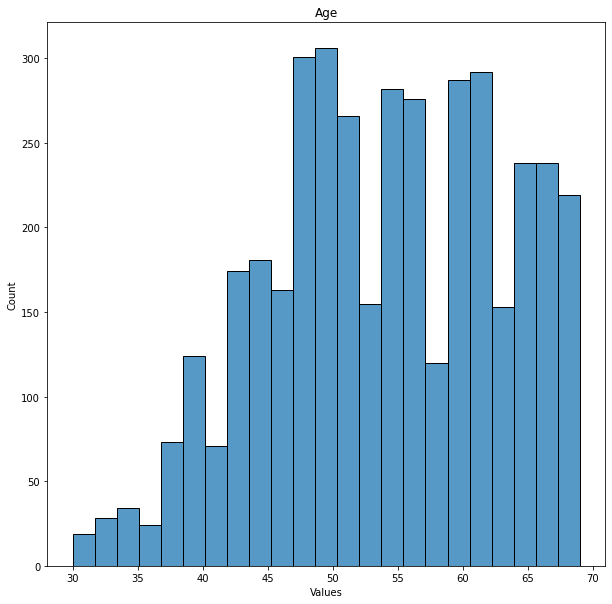

--------------------------------------------------------------------------------

count    4024.000000
mean       30.473658
std        21.119696
min         1.000000
1%          4.000000
5%          9.000000
10%        12.000000
20%        15.000000
30%        18.000000
40%        20.000000
50%        25.000000
60%        28.000000
70%        35.000000
80%        43.000000
90%        60.000000
95%        75.000000
99%       102.540000
max       140.000000
Name: Tumor Size, dtype: float64


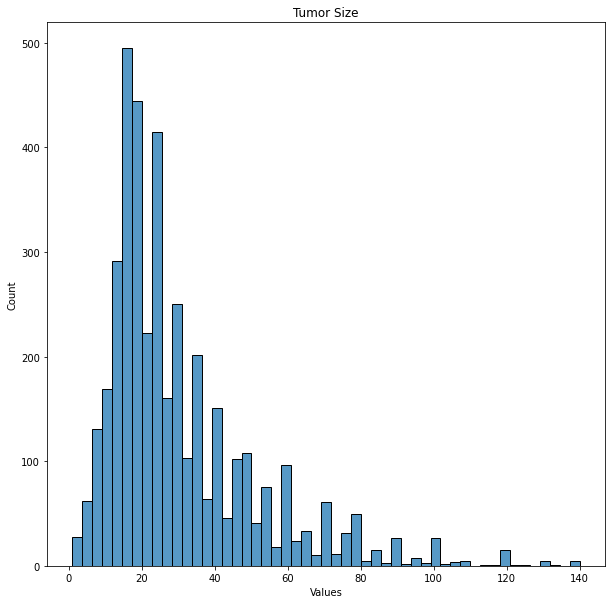

--------------------------------------------------------------------------------

count    4024.000000
mean       14.357107
std         8.099675
min         1.000000
1%          1.000000
5%          2.000000
10%         4.000000
20%         8.000000
30%        10.000000
40%        12.000000
50%        14.000000
60%        16.000000
70%        18.000000
80%        20.000000
90%        25.000000
95%        28.000000
99%        38.770000
max        61.000000
Name: Regional Node Examined, dtype: float64


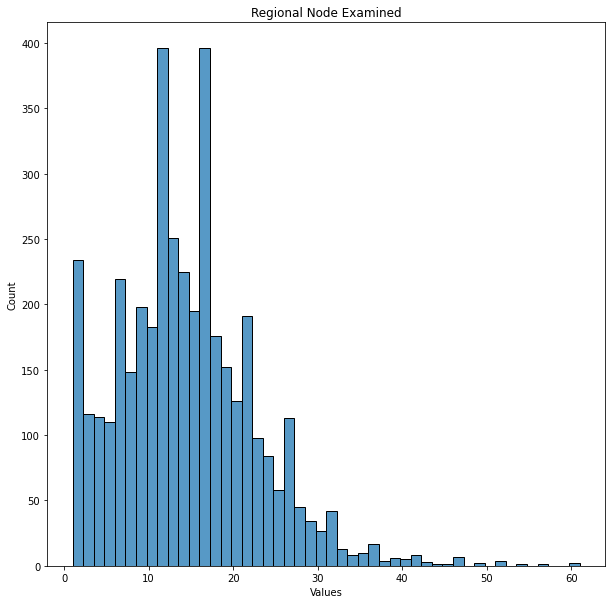

--------------------------------------------------------------------------------

count    4024.000000
mean        4.158052
std         5.109331
min         1.000000
1%          1.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         3.000000
70%         4.000000
80%         6.000000
90%        10.000000
95%        15.000000
99%        26.000000
max        46.000000
Name: Reginol Node Positive, dtype: float64


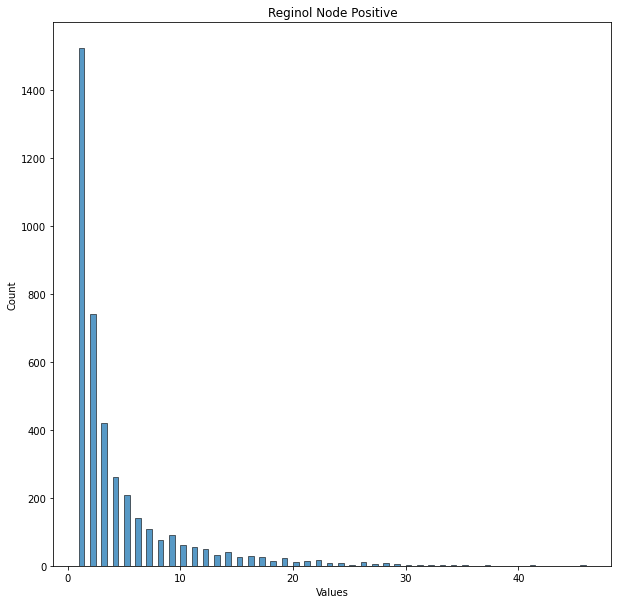

--------------------------------------------------------------------------------

count    4024.000000
mean       71.297962
std        22.921430
min         1.000000
1%          8.000000
5%         26.150000
10%        44.000000
20%        53.000000
30%        60.000000
40%        66.000000
50%        73.000000
60%        80.000000
70%        86.000000
80%        94.000000
90%       100.000000
95%       103.000000
99%       107.000000
max       107.000000
Name: Survival Months, dtype: float64


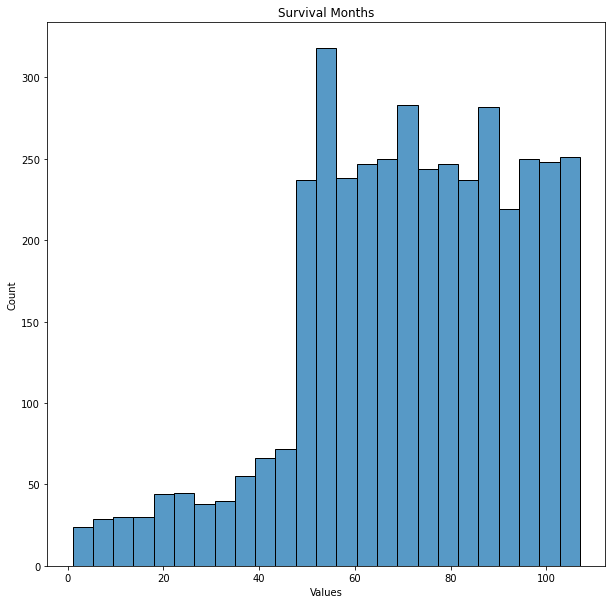

--------------------------------------------------------------------------------



In [12]:
for col in numerical_columns:
  numerical_analysis(df,col,plot=True)

## Categorical Analysis

In [13]:
def categorical_analysis(df,col,plot = False):
  print(pd.DataFrame({col:df[col].value_counts(),
                      "Ratio":df[col].value_counts()/len(df)}))
  
  if plot:
    plt.figure(figsize = (10,10))
    sns.countplot(x = df[col],data =df)
    plt.title(col)
    plt.xlabel("Values")
    plt.xticks(rotation = 30)
    plt.show(block = True)
  print("--------------------------------------------------------------------------------\n")


       Race     Ratio
White  3413  0.848161
Other   320  0.079523
Black   291  0.072316


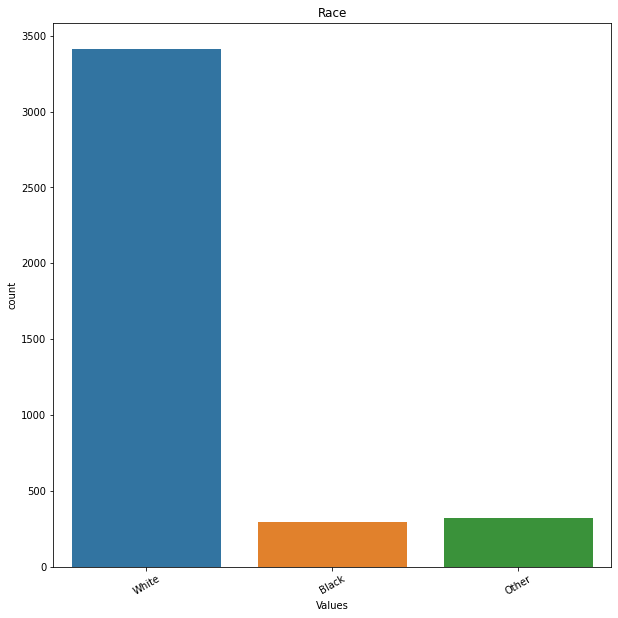

--------------------------------------------------------------------------------

           Marital Status     Ratio
Married              2643  0.656809
Single                615  0.152833
Divorced              486  0.120775
Widowed               235  0.058400
Separated              45  0.011183


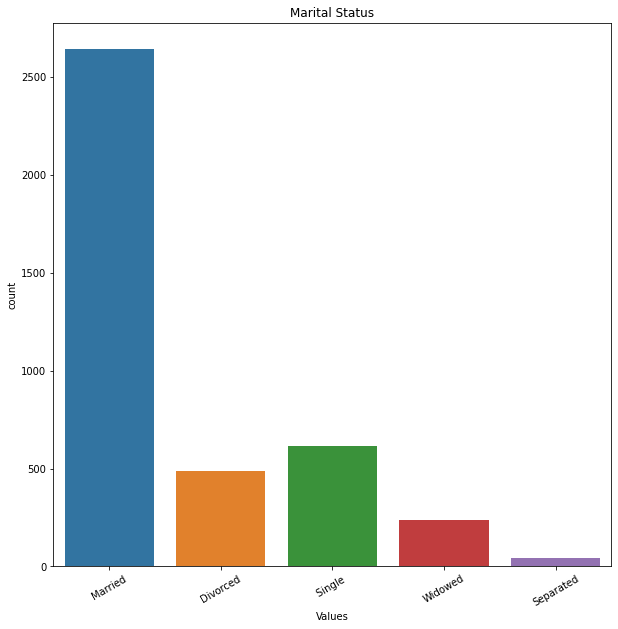

--------------------------------------------------------------------------------

    T Stage      Ratio
T2      1786  0.443837
T1      1603  0.398360
T3       533  0.132455
T4       102  0.025348


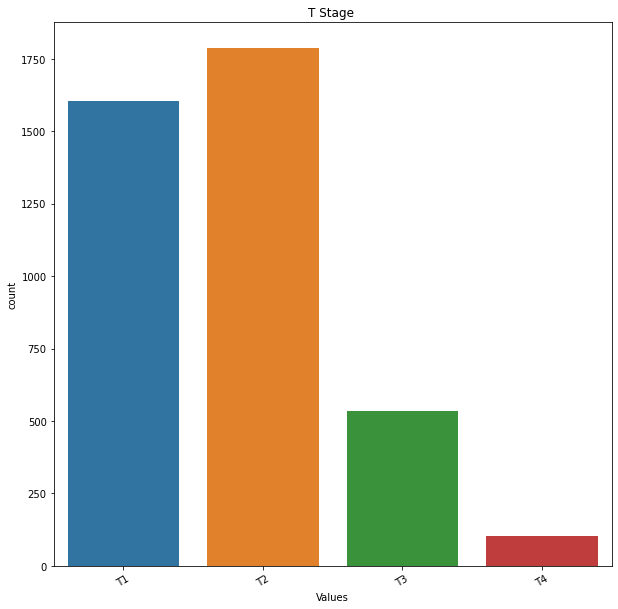

--------------------------------------------------------------------------------

    N Stage     Ratio
N1     2732  0.678926
N2      820  0.203777
N3      472  0.117296


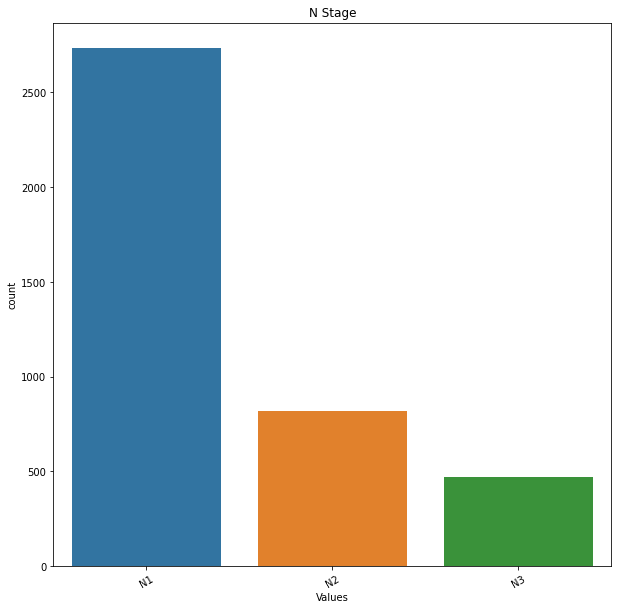

--------------------------------------------------------------------------------

      6th Stage     Ratio
IIA        1305  0.324304
IIB        1130  0.280815
IIIA       1050  0.260934
IIIC        472  0.117296
IIIB         67  0.016650


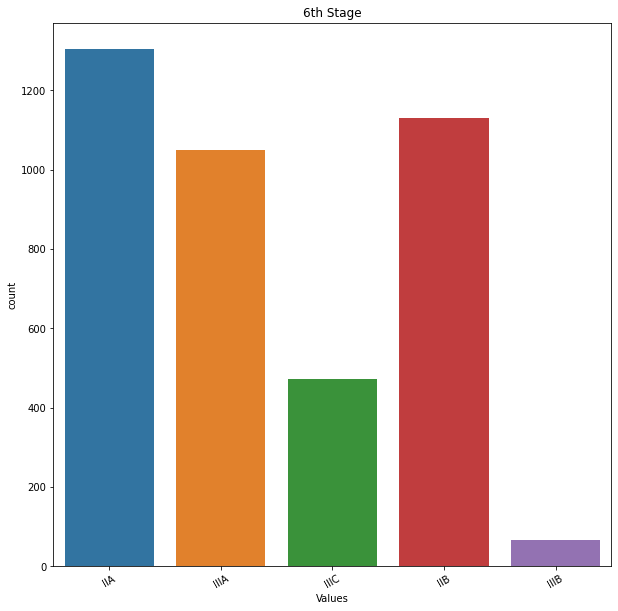

--------------------------------------------------------------------------------

                           differentiate     Ratio
Moderately differentiated           2351  0.584245
Poorly differentiated               1111  0.276093
Well differentiated                  543  0.134940
Undifferentiated                      19  0.004722


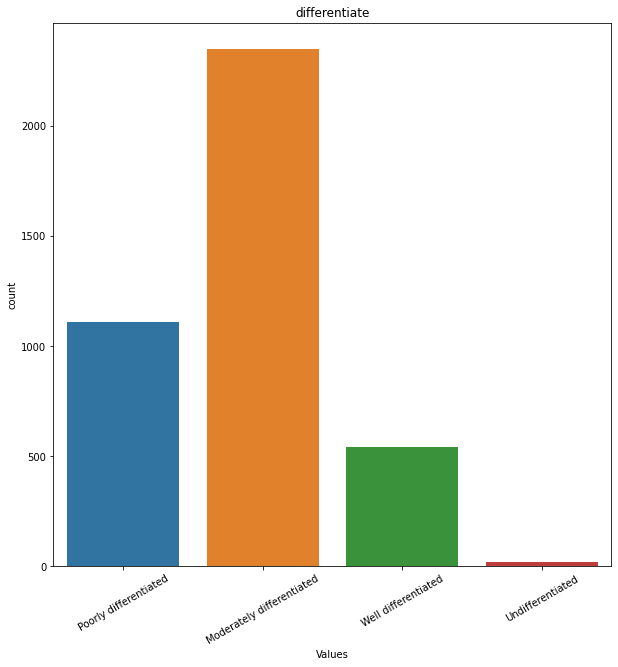

--------------------------------------------------------------------------------

                       Grade     Ratio
2                       2351  0.584245
3                       1111  0.276093
1                        543  0.134940
 anaplastic; Grade IV     19  0.004722


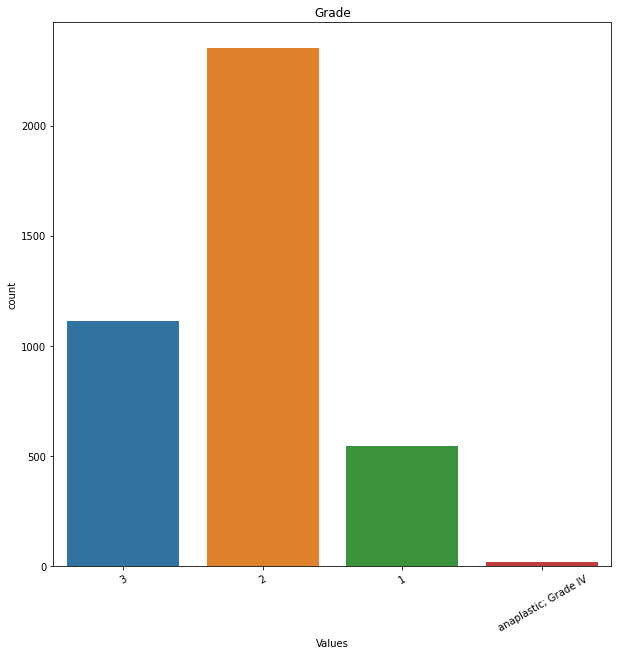

--------------------------------------------------------------------------------

          A Stage     Ratio
Regional     3932  0.977137
Distant        92  0.022863


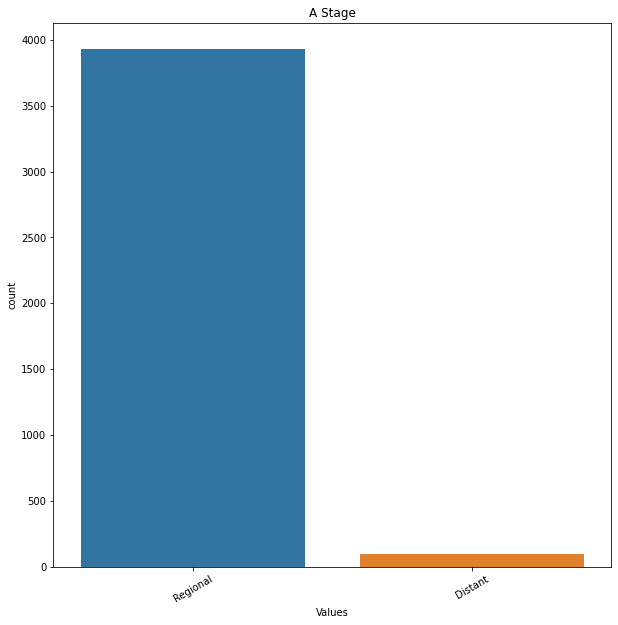

--------------------------------------------------------------------------------

          Estrogen Status     Ratio
Positive             3755  0.933151
Negative              269  0.066849


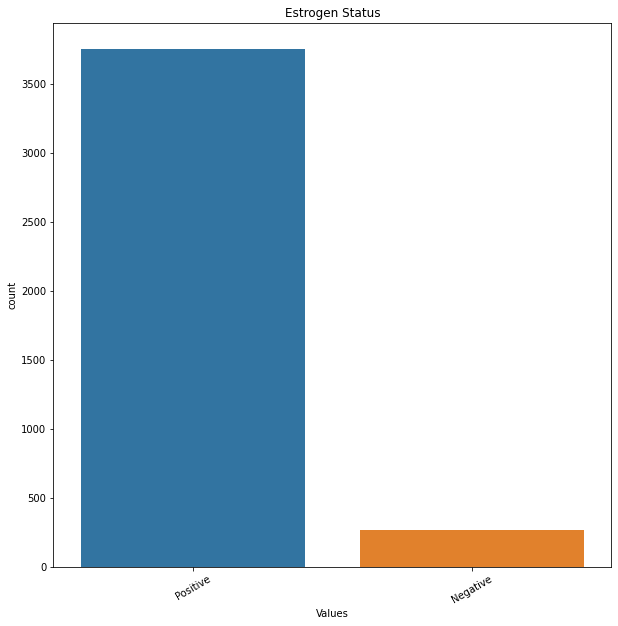

--------------------------------------------------------------------------------

          Progesterone Status     Ratio
Positive                 3326  0.826541
Negative                  698  0.173459


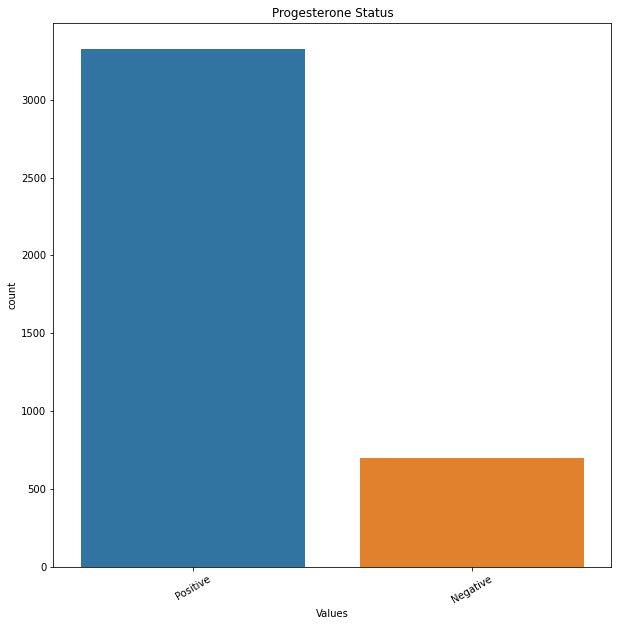

--------------------------------------------------------------------------------

       Status     Ratio
Alive    3408  0.846918
Dead      616  0.153082


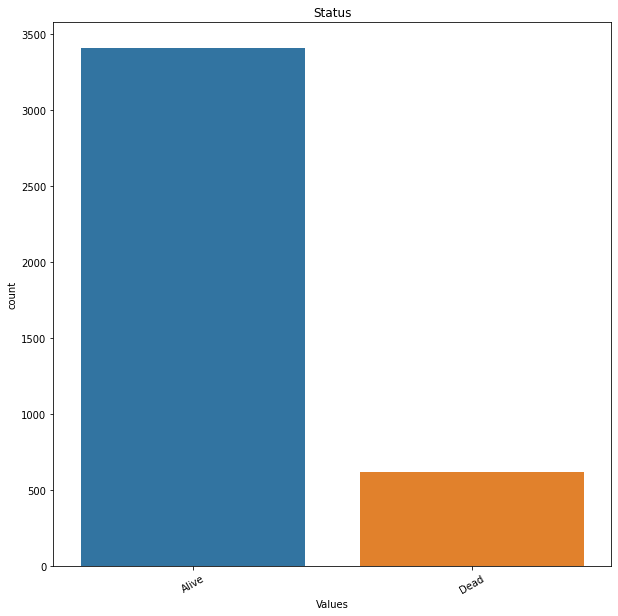

--------------------------------------------------------------------------------



In [14]:
for col in categorical_columns:
  categorical_analysis(df,col,plot=True)

In [15]:
index = df[df["Estrogen Status"] == 14.5].index
df.drop(index,inplace = True)
index = df[df["Estrogen Status"] == 18.5].index
df.drop(index,inplace = True)
index = df[df["Estrogen Status"] == 16].index
df.drop(index,inplace = True)

In [16]:
for col in categorical_columns:
  categorical_analysis(df,col)

       Race     Ratio
White  3413  0.848161
Other   320  0.079523
Black   291  0.072316
--------------------------------------------------------------------------------

           Marital Status     Ratio
Married              2643  0.656809
Single                615  0.152833
Divorced              486  0.120775
Widowed               235  0.058400
Separated              45  0.011183
--------------------------------------------------------------------------------

    T Stage      Ratio
T2      1786  0.443837
T1      1603  0.398360
T3       533  0.132455
T4       102  0.025348
--------------------------------------------------------------------------------

    N Stage     Ratio
N1     2732  0.678926
N2      820  0.203777
N3      472  0.117296
--------------------------------------------------------------------------------

      6th Stage     Ratio
IIA        1305  0.324304
IIB        1130  0.280815
IIIA       1050  0.260934
IIIC        472  0.117296
IIIB         67  0.016650
---------

In [17]:
for col in categorical_columns:
  for col1 in categorical_columns:
    if col != col1:
      print(df.groupby([col,col1])[Target].count())
      print("\n##################################################\n##################################################\n")

Race   Marital Status
Black  Divorced            40
       Married            113
       Separated            8
       Single             102
       Widowed             28
Other  Divorced            29
       Married            237
       Separated            4
       Single              33
       Widowed             17
White  Divorced           417
       Married           2293
       Separated           33
       Single             480
       Widowed            190
Name: Status, dtype: int64

##################################################
##################################################

Race   T Stage 
Black  T1           117
       T2           132
       T3            33
       T4             9
Other  T1           113
       T2           162
       T3            41
       T4             4
White  T1          1373
       T2          1492
       T3           459
       T4            89
Name: Status, dtype: int64

##################################################
##############

## Correlation Analysis

In [18]:
corr_df = df.corr()
corr_df

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.077215,-0.033345,0.012586,-0.009390
Tumor Size,-0.077215,1.000000,0.104352,0.242322,-0.086901
Regional Node Examined,-0.033345,0.104352,1.000000,0.411580,-0.022054
Reginol Node Positive,0.012586,0.242322,0.411580,1.000000,-0.135214
Survival Months,-0.009390,-0.086901,-0.022054,-0.135214,1.000000


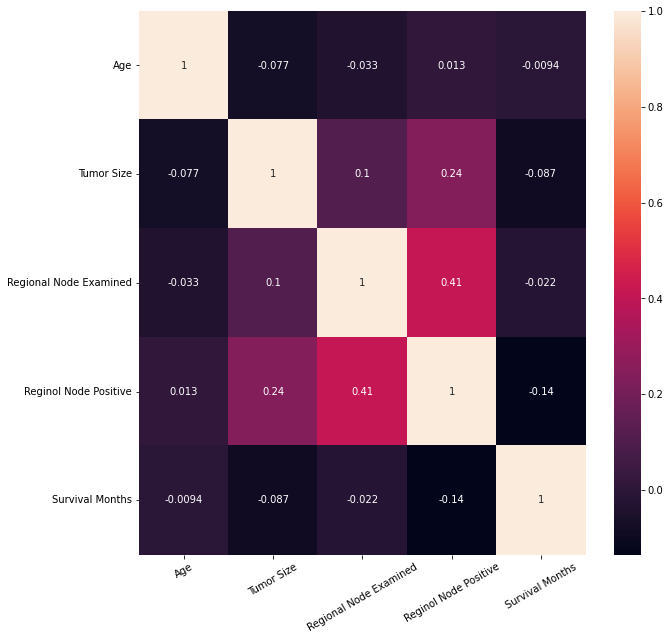

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_df,annot = True)
plt.xticks(rotation = 30)
plt.show()

## Outlier Values

In [20]:
def outlier_thresholds(df,col,qu_ratio1 = 0.25, qu_ratio3 = 0.75):
  """
    outlier_thresholds function is find feature thresholds values

    Parameters:
      df: DataFrame
      col: Columns
      qu_ratio1: Lower quarter, fixed value = 0.25
      qu_ratio3: Upper quarter fixed value = 0.75

    Return:
      low, up
  """
  
  q1 = df[col].quantile(qu_ratio1)
  q3 = df[col].quantile(qu_ratio3)

  ıqr = q3 - q1

  low = q1 - 1.5*ıqr
  up = q3 + 1.5*ıqr

  return low, up

In [21]:
for col in numerical_columns:
  print(col,"--",outlier_thresholds(df,col,0.2,0.8))

Age -- (20.5, 88.5)
Tumor Size -- (-27.0, 85.0)
Regional Node Examined -- (-10.0, 38.0)
Reginol Node Positive -- (-6.5, 13.5)
Survival Months -- (-8.5, 155.5)


In [22]:
def outlier_check(df,col,qu_ratio1 = 0.25,qu_ratio3 = 0.75):
  """
    outlier_check function is check for outlier values. Return True if feature have a outlier values. 
    But features haven`t outlier values return False.

    Parameters:
      df: DataFrame
      col: Columns
      qu_ratio1: Low quarter, fixed value = 0.25
      qu_ratio3: Upper quarter, fixed value = 0.75

    Return:
      True or False

  """
  
  low,up = outlier_thresholds(df,col,qu_ratio1,qu_ratio3)

  if(df[(df[col] < low) | (df[col] > up)].any(axis = None)):
    return True
  else:
    return False

In [23]:
for col in numerical_columns:
  print(col,"--",outlier_check(df,col,0.2,0.8))

Age -- False
Tumor Size -- True
Regional Node Examined -- True
Reginol Node Positive -- True
Survival Months -- False


In [24]:
def number_of_outlier_values(df,col,qu_ratio1 = 0.25,qu_ratio3 = 0.75):
  """
    number_of_outlier_values function is find number of outlier values.

    Parameters:
      df: DataFrame
      col: Columns
      qu_ratio1: Lower quarter, fixed value = 0.25
      qu_ratio3: Upper quarter, fixed value = 0.75
  """

  low, up = outlier_thresholds(df,col,qu_ratio1,qu_ratio3)

  if outlier_check(df,col,qu_ratio1,qu_ratio3) == True:
    print(col,": ",len(df[(df[col] < low) | (df[col] > up)]))

In [25]:
print("-- NUMBER OF OUTLIER VALUES --")
for col in numerical_columns:
  number_of_outlier_values(df,col,0.2,0.8)

-- NUMBER OF OUTLIER VALUES --
Tumor Size :  110
Regional Node Examined :  41
Reginol Node Positive :  261


-Comment-
Outlier values should fill with thresholds values.

In [26]:
def fill_outlier_values(df,col,qu_ratio1 = 0.25,qu_ratio3 = 0.75):
  """
    fill_outlier_values function is fill outlier values with thresholds values.

    Parameters:
      df: DataFrame
      col: Columns
      qu_ratio1 = Lower quarter, fixed value = 0.25
      qu_ratio3 = Upper quarter, fixed value = 0.75

    Return:
      df  
  """
  check = outlier_check(df,col,qu_ratio1,qu_ratio3)
  if check == True:
    low, up = outlier_thresholds(df,col,qu_ratio1,qu_ratio3)
    df[df[col] < low] = low
    df[df[col] > up] = up

  return df

In [27]:
for col in numerical_columns:
  df = fill_outlier_values(df,col,0.2,0.8)

for col in numerical_columns:
  print(col," -- ",outlier_check(df,col,0.2,0.8))


Age  --  True
Tumor Size  --  True
Regional Node Examined  --  True
Reginol Node Positive  --  False
Survival Months  --  False


## Nan Values

In [28]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Dataframe haven`t null values

# Encoding

## Label Encoding

In [29]:
binary_columns = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() == 2]
binary_columns

[]

In [30]:
label_enc = LabelEncoder()
for col in binary_columns:
  df[col] = label_enc.fit_transform(df[col])

In [31]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1.0,60.0,Alive
1,50.0,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5.0,62.0,Alive
2,58.0,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7.0,75.0,Alive
3,58.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1.0,84.0,Alive
4,47.0,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1.0,50.0,Alive


## One Hot Encoding

In [32]:
one_hot_columns = [col for col in categorical_columns if col not in binary_columns and col != Target]
one_hot_columns

['Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status']

In [33]:
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

In [34]:
df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N1,N Stage_N2,N Stage_N3,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,68.0,4.0,24.0,1.0,60.0,Alive,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
1,50.0,35.0,14.0,5.0,62.0,Alive,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
2,58.0,63.0,14.0,7.0,75.0,Alive,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1
3,58.0,18.0,2.0,1.0,84.0,Alive,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
4,47.0,41.0,3.0,1.0,50.0,Alive,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1


# Scaling

In [35]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N1,N Stage_N2,N Stage_N3,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive
0,0.981982,0.035714,0.589744,0.00,0.556604,Alive,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
1,0.657658,0.404762,0.333333,0.32,0.575472,Alive,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1
2,0.801802,0.738095,0.333333,0.48,0.698113,Alive,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1
3,0.801802,0.202381,0.025641,0.00,0.783019,Alive,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
4,0.603604,0.476190,0.051282,0.00,0.462264,Alive,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1


In [36]:
df["Status"].unique()

array(['Alive', 'Dead', 13.5], dtype=object)

In [37]:
index = df[df["Status"] == 13.5].index
df.drop(index,inplace = True)

In [38]:
df["Status"].unique()

array(['Alive', 'Dead'], dtype=object)

In [39]:
df.loc[df["Status"] == "Alive","New_Status"] = 1
df.loc[df["Status"] == "Dead","New_Status"] = 0

In [40]:
df.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage _T1,T Stage _T2,T Stage _T3,T Stage _T4,N Stage_N1,N Stage_N2,N Stage_N3,6th Stage_IIA,6th Stage_IIB,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_ anaplastic; Grade IV,Grade_1,Grade_2,Grade_3,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,New_Status
0,0.981982,0.035714,0.589744,0.00,0.556604,Alive,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1.0
1,0.657658,0.404762,0.333333,0.32,0.575472,Alive,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1.0
2,0.801802,0.738095,0.333333,0.48,0.698113,Alive,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1.0
3,0.801802,0.202381,0.025641,0.00,0.783019,Alive,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1.0
4,0.603604,0.476190,0.051282,0.00,0.462264,Alive,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1.0


# Model

In [41]:
X = df.drop(["Status","New_Status"],axis = 1)
y = df["New_Status"]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 16)

## Logistic Regression

### Holdout

In [43]:
logistic_regression_model = LogisticRegression().fit(X_train,y_train)

In [44]:
logistic_regression_pred = logistic_regression_model.predict(X_test)

In [45]:
print(classification_report(y_test,logistic_regression_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.34      0.47       148
         1.0       0.91      0.99      0.94       949

    accuracy                           0.90      1097
   macro avg       0.85      0.66      0.71      1097
weighted avg       0.89      0.90      0.88      1097



### Cross Validation

In [46]:
logistic_regression_cross_val_model = LogisticRegression().fit(X_train,y_train)

In [47]:
cv_result_logi_reg = cross_validate(logistic_regression_cross_val_model,
                                    X_test,y_test,
                                    cv=5,
                                    scoring=["accuracy","f1","roc_auc","precision","recall"])

In [48]:
for i in cv_result_logi_reg:
  print(i,": ",cv_result_logi_reg[i].mean())

fit_time :  0.03796706199645996
score_time :  0.012479209899902343
test_accuracy :  0.8988127853881277
test_f1 :  0.9439774113473899
test_roc_auc :  0.8632715313187183
test_precision :  0.9060621922919114
test_recall :  0.9852408799777221


## KNN

### Holdout

In [49]:
knn_holdout_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)

In [50]:
knn_holdout_pred = knn_holdout_model.predict(X_test)

In [51]:
print(classification_report(y_test,knn_holdout_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.14      0.22       148
         1.0       0.88      0.98      0.93       949

    accuracy                           0.87      1097
   macro avg       0.72      0.56      0.57      1097
weighted avg       0.84      0.87      0.83      1097



### Cross Validation

In [52]:
knn_cross_val_model = KNeighborsClassifier().fit(X_train,y_train)

In [53]:
cross_val_knn = cross_validate(knn_cross_val_model,
                               X_test,y_test,
                               cv=5,
                               scoring=["accuracy","f1","roc_auc","precision","recall"])

In [54]:
for i in cross_val_knn:
  print(i,": ",cross_val_knn[i].mean())

fit_time :  0.0043429374694824215
score_time :  0.033273172378540036
test_accuracy :  0.8659941884599419
test_f1 :  0.9268769867250229
test_roc_auc :  0.7235787937276142
test_precision :  0.8777113758855727
test_recall :  0.982066276803119


## Decision Tree Classifier

### Holdout

In [55]:
decision_tree_holdout_model = DecisionTreeClassifier().fit(X_train,y_train)

In [56]:
decision_tree_pred = decision_tree_holdout_model.predict(X_test)

In [57]:
print(classification_report(y_test,decision_tree_pred))

              precision    recall  f1-score   support

         0.0       0.49      0.52      0.51       148
         1.0       0.92      0.92      0.92       949

    accuracy                           0.86      1097
   macro avg       0.71      0.72      0.71      1097
weighted avg       0.87      0.86      0.86      1097



### Cross Validation

In [58]:
cross_val_decision_tree_model = DecisionTreeClassifier().fit(X_train,y_train)

In [59]:
cv_decision_tree = cross_validate(cross_val_decision_tree_model,
                                  X_test,y_test,
                                  cv=5,
                                  scoring=["accuracy","f1","roc_auc","precision","recall"])

In [60]:
for i in cv_decision_tree:
  print(i,": ",cv_decision_tree[i].mean())

fit_time :  0.008345365524291992
score_time :  0.009133005142211914
test_accuracy :  0.8814528850145289
test_f1 :  0.9313370946696079
test_roc_auc :  0.7547518220839455
test_precision :  0.9349995575253308
test_recall :  0.9283542188805347


## Random Forest

### Holdout

In [61]:
random_forest_hol_model = RandomForestClassifier(random_state = 16).fit(X_train,y_train)

In [62]:
random_forest_pred = random_forest_hol_model.predict(X_test)

In [63]:
print(classification_report(y_test,random_forest_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.42      0.55       148
         1.0       0.92      0.99      0.95       949

    accuracy                           0.91      1097
   macro avg       0.87      0.70      0.75      1097
weighted avg       0.90      0.91      0.90      1097



### Cross Validation

In [64]:
random_forest_cross_val_model = RandomForestClassifier(random_state = 16).fit(X_train,y_train)

In [65]:
cv_random_forest = cross_validate(random_forest_cross_val_model,
                                    X_test,y_test,
                                    cv =5,
                                     scoring=["accuracy","f1","roc_auc","precision","recall"])

In [66]:
for i in cv_random_forest:
  print(i,": ",cv_random_forest[i].mean())

fit_time :  0.19895997047424316
score_time :  0.039190149307250975
test_accuracy :  0.9161311747613118
test_f1 :  0.953096754371898
test_roc_auc :  0.8687864584833731
test_precision :  0.9240038033149014
test_recall :  0.9841771094402674


## Gradient Boosting

### Holdout

In [67]:
grad_boost_holdout_model = GradientBoostingClassifier(random_state = 16).fit(X_train,y_train)

In [68]:
grad_boost_hol_pred = grad_boost_holdout_model.predict(X_test)

In [69]:
print(classification_report(y_test,grad_boost_hol_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.49      0.60       148
         1.0       0.93      0.98      0.95       949

    accuracy                           0.91      1097
   macro avg       0.85      0.74      0.78      1097
weighted avg       0.91      0.91      0.90      1097



### Cross Validation

In [70]:
grad_boost_cross_val_model = GradientBoostingClassifier(random_state = 16).fit(X_train,y_train)

In [71]:
grad_boost_cv = cross_validate(grad_boost_cross_val_model,
                               X_test,y_test,
                               cv=5,
                               scoring=["accuracy","f1","roc_auc","precision","recall"])

In [72]:
for i in grad_boost_cv:
  print(i,": ",grad_boost_cv[i].mean())

fit_time :  0.18610696792602538
score_time :  0.009679126739501952
test_accuracy :  0.9133997509339975
test_f1 :  0.9508907985602553
test_roc_auc :  0.8878543165064642
test_precision :  0.934118489910041
test_recall :  0.9683876357560568


## LGBM

### Holdout

In [73]:
lgbm_hol_model = LGBMClassifier(random_state = 16).fit(X_train,y_train)

In [74]:
lgbm_hol_pred = lgbm_hol_model.predict(X_test)

In [75]:
print(classification_report(y_test,lgbm_hol_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.49      0.62       148
         1.0       0.93      0.98      0.95       949

    accuracy                           0.92      1097
   macro avg       0.87      0.74      0.78      1097
weighted avg       0.91      0.92      0.91      1097



### Cross Validation

In [76]:
lgbm_cross_val_model = LGBMClassifier(random_state = 16).fit(X_train,y_train)

In [77]:
lgbm_cv = cross_validate(lgbm_cross_val_model,
                         X_test,y_test,
                         cv = 5,
                         scoring=["accuracy","f1","roc_auc","precision","recall"])

In [78]:
for i in lgbm_cv:
  print(i,": ",lgbm_cv[i].mean())

fit_time :  0.06877293586730956
score_time :  0.013448047637939452
test_accuracy :  0.9124823578248236
test_f1 :  0.9506069950850495
test_roc_auc :  0.8737439703985379
test_precision :  0.9286669504399949
test_recall :  0.9736563631300473


## CatBoost

### Holdout

In [79]:
catboost_hol = CatBoostClassifier(random_state = 16,verbose = False).fit(X_train,y_train)

In [80]:
catboost_hol_pred = catboost_hol.predict(X_test)

In [81]:
print(classification_report(y_test,catboost_hol_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.49      0.60       148
         1.0       0.92      0.98      0.95       949

    accuracy                           0.91      1097
   macro avg       0.85      0.73      0.78      1097
weighted avg       0.91      0.91      0.90      1097



### Cross Validation

In [177]:
catboost_cv_model = CatBoostClassifier(random_state = 16,verbose = False).fit(X_train,y_train)

In [178]:
cv_catboost = cross_validate(catboost_cv_model,
                             X_test,y_test,
                             cv=5,
                             scoring=["accuracy","f1","roc_auc","precision","recall"])

In [179]:
for i in cv_catboost:
  print(i,": ",cv_catboost[i].mean())

fit_time :  1.3025651931762696
score_time :  0.012613964080810548
test_accuracy :  0.9161311747613118
test_f1 :  0.9528980437463351
test_roc_auc :  0.882497584958565
test_precision :  0.9273214320554093
test_recall :  0.9799777220829851


# Model Improvement

## Logistic Regression

In [85]:
logi_reg_param = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [86]:
logistic_reg_grid_search = GridSearchCV(logistic_regression_cross_val_model,
                                       logi_reg_param,
                                        cv = 5,
                                        n_jobs = -1,
                                        verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [87]:
print(logistic_reg_grid_search.best_params_)

{'class_weight': 'balanced', 'max_iter': 50, 'solver': 'sag'}


In [88]:
logistic_reg_GS_model = logistic_regression_cross_val_model.set_params(**logistic_reg_grid_search.best_params_,
                                                                       random_state = 16).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [89]:
logistic_final_pred = logistic_reg_GS_model.predict(X_test)

In [90]:
print(classification_report(y_test,logistic_final_pred))

              precision    recall  f1-score   support

         0.0       0.37      0.82      0.51       148
         1.0       0.97      0.79      0.87       949

    accuracy                           0.79      1097
   macro avg       0.67      0.80      0.69      1097
weighted avg       0.89      0.79      0.82      1097



## KNN

In [91]:
knn_parameters = {"n_neighbors":range(3,9),
                  "weights":["uniform", "distance"],
                  "algorithm":["auto","ball_tree","kd_tree","brute"],
                  "leaf_size" : range(25,36)}

In [92]:
knn_grid_search = GridSearchCV(knn_cross_val_model,
                               knn_parameters,
                               cv = 5,
                               n_jobs = -1,
                               verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 528 candidates, totalling 2640 fits


In [93]:
print(knn_grid_search.best_params_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 7, 'weights': 'uniform'}


In [96]:
knn_final_model = knn_cross_val_model.set_params(**knn_grid_search.best_params_).fit(X_train,y_train)

In [97]:
knn_final_pred = knn_final_model.predict(X_test)

In [98]:
print(classification_report(y_test,knn_final_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.13      0.22       148
         1.0       0.88      0.99      0.93       949

    accuracy                           0.88      1097
   macro avg       0.81      0.56      0.58      1097
weighted avg       0.86      0.88      0.84      1097



## Decision Tree Classifier

In [101]:
decision_tree_param = {"criterion":["gini", "entropy"],
                       "splitter":["best", "random"],
                       "min_samples_split":range(2,10),
                       "max_features":["auto","sqrt","log2"]}

In [102]:
decision_tree_gridcv = GridSearchCV(cross_val_decision_tree_model,
                                    decision_tree_param,
                                    cv=5,
                                    n_jobs = -1,
                                    verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [104]:
print(decision_tree_gridcv.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 8, 'splitter': 'best'}


In [106]:
decision_tree_final_model = cross_val_decision_tree_model.set_params(**decision_tree_gridcv.best_params_,
                                                                      random_state = 16).fit(X_train,y_train)

In [107]:
decision_tree_final_pred = decision_tree_final_model.predict(X_test)

In [108]:
print(classification_report(y_test,decision_tree_final_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.42      0.44       148
         1.0       0.91      0.93      0.92       949

    accuracy                           0.86      1097
   macro avg       0.69      0.67      0.68      1097
weighted avg       0.85      0.86      0.86      1097



## Random Forest

In [110]:
random_forest_params = {"n_estimators":range(75,126),
                        "criterion":["gini", "entropy"],
                        "max_features":["sqrt","log2"],
                        "class_weight":["balanced", "balanced_subsample"]}

In [112]:
random_forest_gridcv = GridSearchCV(random_forest_cross_val_model,
                                    random_forest_params,
                                    cv=5,
                                    n_jobs=-1,
                                    verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 408 candidates, totalling 2040 fits


In [114]:
print(random_forest_gridcv.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 82}


In [116]:
random_forest_final_model = random_forest_cross_val_model.set_params(**random_forest_gridcv.best_params_,
                                                                     random_state = 16).fit(X_train,y_train)

In [117]:
random_forest_final_pred = random_forest_final_model.predict(X_test)

In [120]:
print(classification_report(y_test,random_forest_final_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.42      0.56       148
         1.0       0.92      0.99      0.95       949

    accuracy                           0.91      1097
   macro avg       0.88      0.70      0.75      1097
weighted avg       0.91      0.91      0.90      1097



## Gradient Boosting

In [146]:
gbm_params = {"loss":["deviance","exponential"],
                  "learning_rate":[0.01,0.05,0.1,0.15],
                  "criterion":["friedman_mse","squared_error"],
                  "min_samples_split":range(2,10),
                  "random_state": [16]
                  }

In [147]:
grad_boost_gridcv = GridSearchCV(grad_boost_cross_val_model,
                                 gbm_params,
                                 cv = 5,
                                 n_jobs = -1,
                                 verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


In [148]:
print(grad_boost_gridcv.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'deviance', 'min_samples_split': 4, 'random_state': 16}


In [149]:
grad_boost_final_model = grad_boost_cross_val_model.set_params(**grad_boost_gridcv.best_params_).fit(X_train,y_train)

In [150]:
grad_boost_final_pred = grad_boost_final_model.predict(X_test)

In [151]:
print(classification_report(y_test,grad_boost_final_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.49      0.61       148
         1.0       0.92      0.98      0.95       949

    accuracy                           0.92      1097
   macro avg       0.88      0.74      0.78      1097
weighted avg       0.91      0.92      0.91      1097



## LGBM

In [152]:
lgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [100, 300, 500, 1000],
                   "colsample_bytree": [0.5, 0.7, 1]}

In [153]:
lgbm_gridcv = GridSearchCV(lgbm_cross_val_model,
                           lgbm_params,
                           cv=5,
                           n_jobs = -1,
                           verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [154]:
print(lgbm_gridcv.best_params_)

{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500}


In [156]:
lgbm_final_model = lgbm_cross_val_model.set_params(**lgbm_gridcv.best_params_,
                                                   random_state = 16).fit(X_train,y_train)

In [157]:
lgbm_final_predict = lgbm_final_model.predict(X_test)

In [158]:
print(classification_report(y_test,lgbm_final_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.51      0.63       148
         1.0       0.93      0.99      0.96       949

    accuracy                           0.92      1097
   macro avg       0.89      0.75      0.79      1097
weighted avg       0.92      0.92      0.91      1097



## CatBoost

In [180]:
catboost_params = {"iterations": [200, 500],
                       "learning_rate": [0.01, 0.1],
                       "depth": [3, 6]}

In [181]:
catboost_gridcv = GridSearchCV(catboost_cv_model,
                               catboost_params,
                               cv=5,
                               n_jobs = -1,
                               verbose = True).fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [182]:
print(catboost_gridcv.best_params_)

{'depth': 6, 'iterations': 500, 'learning_rate': 0.01}


In [186]:
catboost_final_model = CatBoostClassifier(**catboost_gridcv.best_params_,random_state = 16,verbose = False).fit(X_train,y_train)

In [187]:
catboost_final_predict = catboost_final_model.predict(X_test)

In [188]:
print(classification_report(y_test,catboost_final_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.48      0.61       148
         1.0       0.92      0.99      0.95       949

    accuracy                           0.92      1097
   macro avg       0.88      0.73      0.78      1097
weighted avg       0.91      0.92      0.91      1097

